# Lab 3: Data processing & Linear models
Goals:
* Load, explore ands split data
* Use the scikit-learn library to train models (linear regression in this case)
 

## Load the real estate evaluation dataset
The data records the historical real estate evaluation collected from Sindian District, Taipei City
Source: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

### Load the dataset
* import ***pandas*** library
* read data from ***.csv*** file
* assign ***df*** as an object containing the data

In [91]:
import pandas as pd
df = pd.read_csv("data\Real estate valuation data set.csv")

### Explore the data

* ***.head(n)*** method return the first n rows
* **Default**: n = 5

In [92]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


* retrieve the data length (number of samples)

In [93]:
len(df)

414

* read data from a ***head***

In [94]:
df["Y house price of unit area"]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

* compute a variety of summary statistics about a series or the columns of a data frame

In [95]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Plot a graph

In [96]:
import matplotlib.pyplot as plt

* Plot a histogram

In [97]:
def plot_histogram(data, x_label:str, y_label:str) -> None:
    fig, ax = plt.subplots()
    ax.hist(data, bins = 20)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

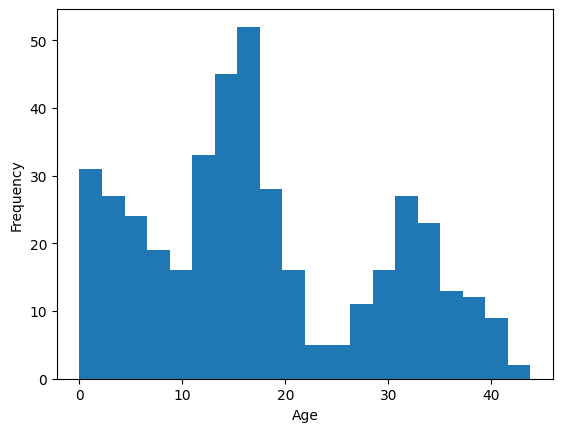

In [98]:
plot_histogram(df["X2 house age"],"Age","Frequency")

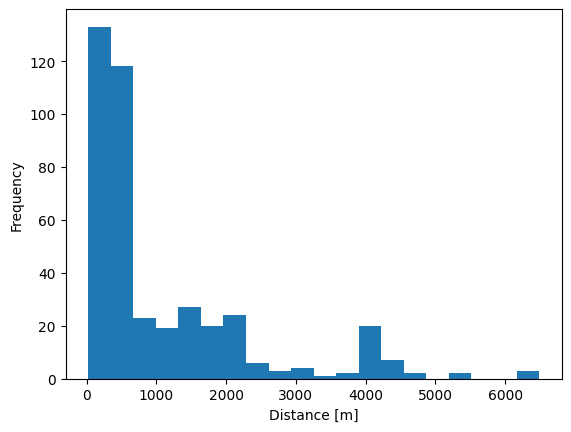

In [99]:
plot_histogram(df["X3 distance to the nearest MRT station"], "Distance [m]", "Frequency")

* Scatter plot

In [100]:
def plot_scatter(x ,y, x_label:str, y_label:str) -> None:
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

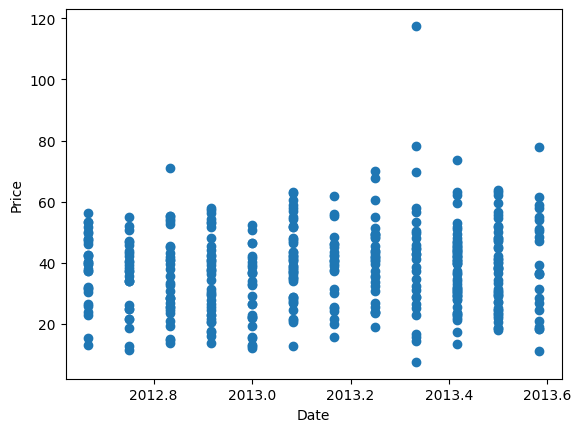

In [101]:
plot_scatter(df["X1 transaction date"], df["Y house price of unit area"],"Date", "Price")

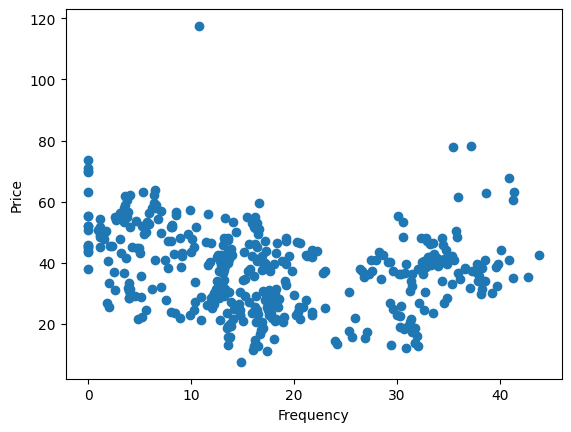

In [102]:
plot_scatter(df["X2 house age"], df["Y house price of unit area"], "Frequency", "Price")

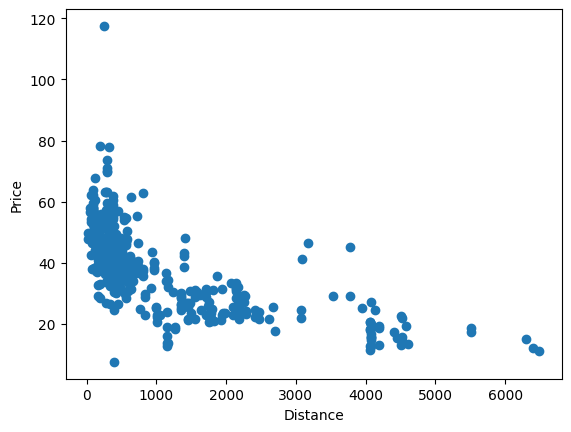

In [103]:
plot_scatter(df["X3 distance to the nearest MRT station"], df["Y house price of unit area"], "Distance", "Price")

### Convert to other formats

In [104]:
Y = df["Y house price of unit area"]
type(Y)

pandas.core.series.Series

In [105]:
Y1 = Y.to_list()
type(Y1)

list

In [106]:
Y2 = Y.to_numpy()
type(Y2)

numpy.ndarray

In [107]:
# save as an excel (.xlsx) file
df.to_excel("data/real_estate_data.xlsx", index=False)

### Split Dataset

In [108]:
features = df.columns.to_list()
features

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [109]:
features = features[1:-1]
features

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

In [110]:
# Convert to numpy arrays
X = df[features].to_numpy()
X.shape

(414, 6)

In [111]:
type(X)

numpy.ndarray

In [112]:
y = df["Y house price of unit area"].to_numpy()
y.shape

(414,)

In [113]:
type(y)

numpy.ndarray

* Import ***sklearn***

In [114]:
from sklearn.model_selection import train_test_split

* **Split by ratio/number**

split matrixes into random train and test subsets
test_size, train_size:
* *float*: 0.0 - 1.0, represent the portion of the dataset in test/train set/split
* *int*: represent the absolute number of test/train samples

random_state: *int*, **default**: *None*
* control the shuffling applied to the data before splitting

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (331, 6)
X_test.shape = (83, 6)


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=0)
print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (314, 6)
X_test.shape = (100, 6)


* Use random seed to make it reproducible

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

X_train[0]

array([2013.083  ,   41.3    ,  124.9912 ,    6.     ,   24.96674,
        121.54039])

* Train, validation, test split

In [151]:
# split into test and development sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# split into train and evaluation tests
X_train, X_val, y_train, y_val = train_test_split(
    X_dev, y_dev, test_size=0.1, random_state=1
)

print("X_train.shape =", X_train.shape)
print("X_val.shape =", X_val.shape)
print("X_test.shape =", X_test.shape)

X_train.shape = (334, 6)
X_val.shape = (38, 6)
X_test.shape = (42, 6)


array([2012.833, 2013.333, 2013.333, 2013.333, 2013.5  , 2013.083,
       2013.25 , 2013.083, 2013.417, 2013.417, 2013.25 , 2013.083,
       2012.833, 2013.083, 2012.833, 2013.583, 2013.167, 2012.833,
       2012.917, 2012.917, 2012.667, 2013.167, 2012.917, 2013.083,
       2012.917, 2012.917, 2013.417, 2012.667, 2013.25 , 2012.833,
       2013.5  , 2013.5  , 2012.833, 2013.583, 2012.917, 2013.417,
       2013.167, 2013.333, 2012.917, 2012.833, 2013.417, 2012.917])

### Fit Linear Model

* Linear regression

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [125]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_train)
loss = mean_squared_error(y_train,y_pred)
print("MSE on training set: ", loss)

MSE on training set:  82.4168097999835


In [139]:
y_pred = model.predict(X_test)
loss = mean_squared_error(y_test,y_pred)
print("MSE on test set: ", loss)
y_pred.shape

MSE on test set:  55.23279626316728


(42,)

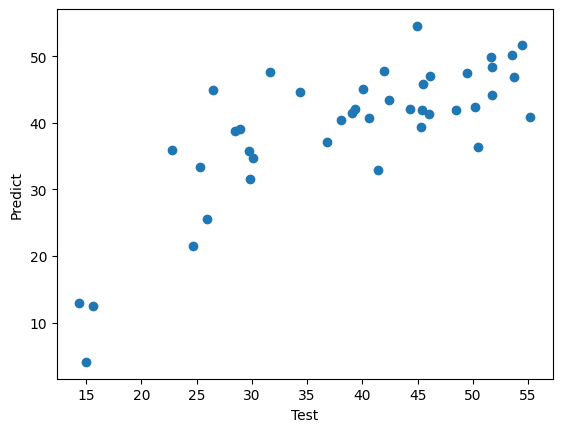

In [166]:
plot_scatter(y_test, y_pred, "Test", "Predict")

### Cross validation

What is the effect of data splitting on the model performance?

In [132]:
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(
    model, X, y, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True
)
cv_results["test_score"]

array([ -49.89813853,  -89.0294996 ,  -57.865991  , -134.82397694,
        -60.0535528 ])

### Rigde regression
What is the effect of regularization on the model performance?

In [133]:
from sklearn.linear_model import Ridge

In [135]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [136]:
mean_squared_error(y_test, y_pred)

55.23279626316728

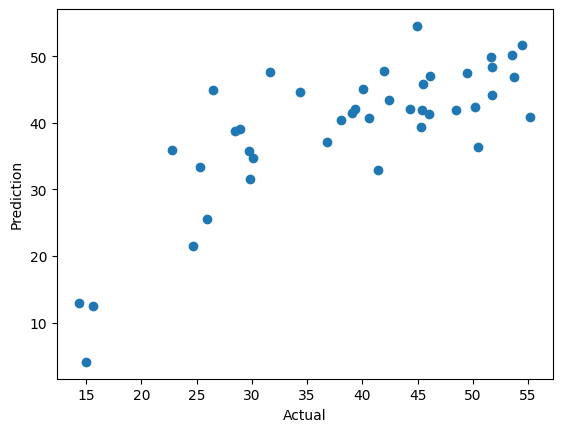

In [137]:
plot_scatter(y_test, y_pred, "Actual", "Prediction")